<a href="https://colab.research.google.com/github/vijayamurugan27/GenerativeAI/blob/main/Copy_of_Multimodal_Chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern AI Pro
Let's practice our prompting skills with this multimodal chatbot

In [ ]:
!pip -q install langchain-anthropic gradio pillow groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.4/198.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.4 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
import os
os.environ["GROQ_API_KEY"] = userdata.get("GROQ_API_KEY")

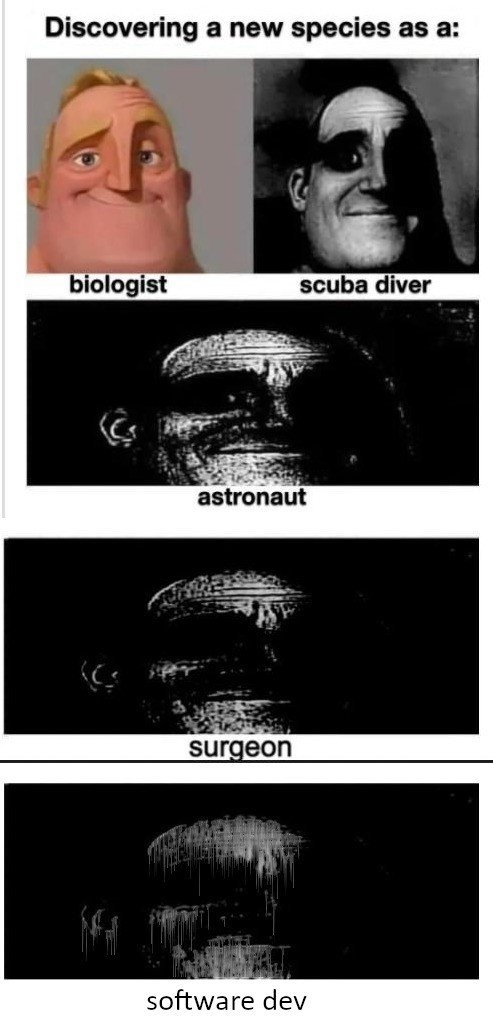

In [ ]:
from groq import Groq
client = Groq()

In [ ]:
from PIL import Image
import io
import base64
import os

# Ensure `client` is properly defined and initialized based on your API (e.g., OpenAI)

def process_file(message, history):
    def encode_image_to_base64(image_path):
        if os.path.exists(image_path):
            with open(image_path, 'rb') as image_file:
                image = Image.open(image_file)
                buffered = io.BytesIO()
                image.save(buffered, format="PNG")
                return base64.b64encode(buffered.getvalue()).decode('utf-8')
        else:
            raise FileNotFoundError(f"File at {image_path} not found.")

    try:
        content = []

        # Add text content if available
        if "text" in message and message["text"]:
            content.append({"type": "text", "text": message["text"]})

        # Add image content if available and not empty
        if "files" in message and isinstance(message["files"], list) and len(message["files"]) > 0:
            if isinstance(message["files"][0], str):  # Ensure it's a path string
                img_base64 = encode_image_to_base64(message["files"][0])
                content.append({"type": "image_url", "image_url": {"url": f"data:image/png;base64,{img_base64}"}})
            else:
                print("Warning: The first item in 'files' is not a valid file path string.")

        # Select model based on content type
        if content:
            model = "llama-3.2-11b-vision-preview" if any(c["type"] == "image_url" for c in content) else "llama3-8b-8192"
            messages = [{"role": "user", "content": content}]
        else:
            raise ValueError("Message must contain either 'files' or 'text'.")

        # Send request to client
        completion = client.chat.completions.create(model=model, messages=messages, temperature=0, max_tokens=1024, top_p=1)
        return completion.choices[0].message.content
    except Exception as e:
        print(f"Error processing file: {e}")
        return None


In [ ]:
# Create a Gradio interface
import gradio as gr
demo = gr.ChatInterface(
    fn=process_file,
    title="Mitra Robot Enterprise Chat",
    multimodal=True
)

# Launch the Gradio interface
demo.launch(share=True, debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py:231: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f6d334c1f2cd6bc918.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install groq
from groq import Groq
IMAGE_DATA_URL="https://cdn.corporatefinanceinstitute.com/assets/amazon-balance-sheet-example.png"




In [ ]:
completion = client.chat.completions.create(
    model="llava-v1.5-7b-4096-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": ""
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://cdn.corporatefinanceinstitute.com/assets/amazon-balance-sheet-example.png"
                    }
                }
            ]
        }
    ],
    temperature=0,
    max_tokens=1024,
    top_p=1,
    stream=False,
    stop=None,
)

print(completion.choices[0].message)